# K Means Clustering Project 

For this project, I have used KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
Note: I actually have the labels for this data set, but I have NOT used them for the KMeans clustering algorithm, since this is an unsupervised learning algorithm.

However, in this case, I have used the labels to try to get an idea of how well the algorithm performed, and hence the classification report and confusion matrix at the end of this project.
___

## The Data

I have used a data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('College_Data', index_col=0)

In [31]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### EDA

#### A scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column

<Axes: xlabel='Grad.Rate', ylabel='Room.Board'>

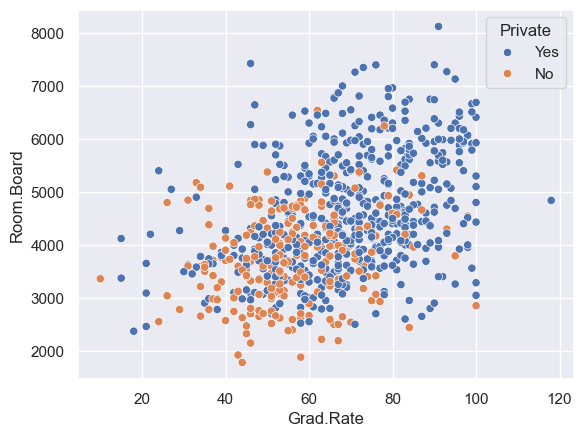

In [10]:
sns.set_theme()
sns.scatterplot(data=df, x='Grad.Rate', y='Room.Board', hue='Private')

#### A scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column

<Axes: xlabel='F.Undergrad', ylabel='Outstate'>

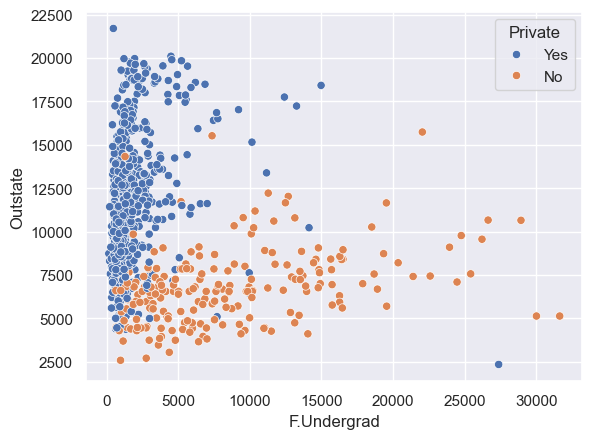

In [11]:
sns.scatterplot(data=df, x='F.Undergrad', y='Outstate', hue='Private')

#### A stacked histogram showing Out of State Tuition based on the Private column

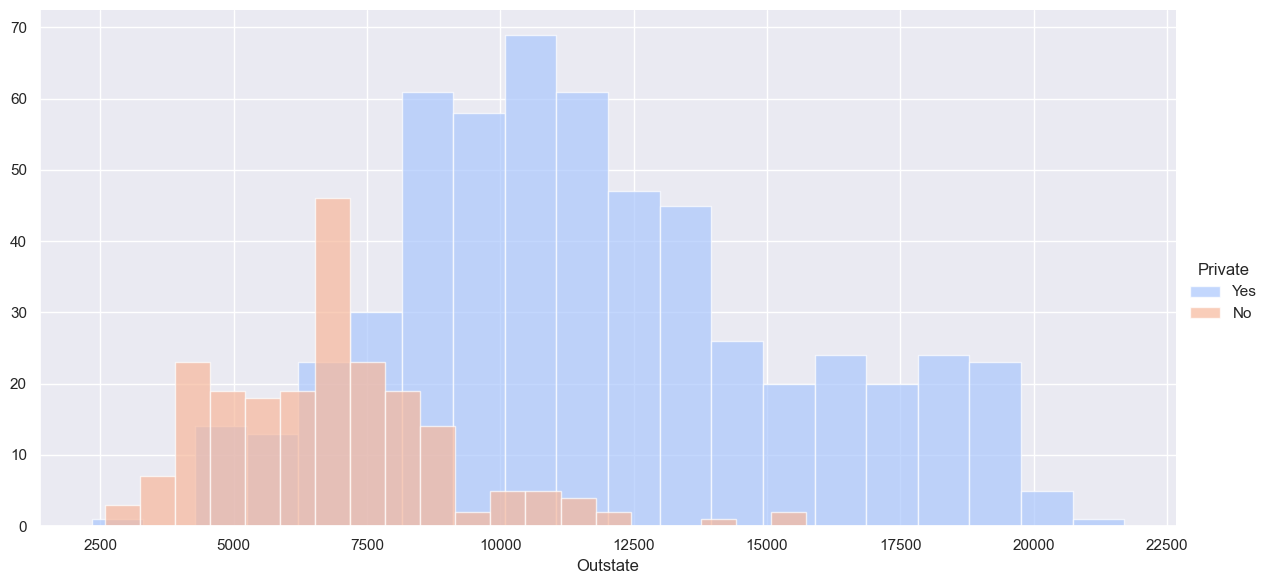

In [19]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)
g.add_legend(title='Private')

#### A stacked histogram showing Grad.Rate based on the Private column

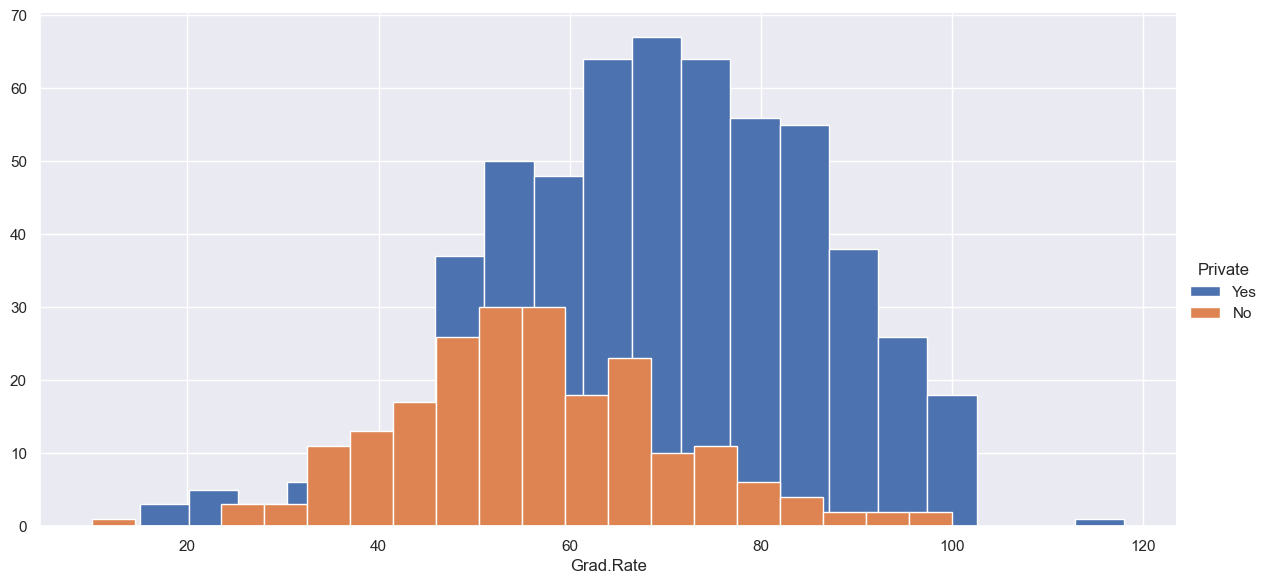

In [20]:
g = sns.FacetGrid(data=df, hue='Private', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20)
g.add_legend(title='Private')

#### There seems to be a private school with a graduation rate of higher than 100%

In [21]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


#### Set the Cazenovia College's graduation rate to 100 so it makes sense

In [32]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [33]:
df.loc['Cazenovia College']['Grad.Rate']

100

In [35]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


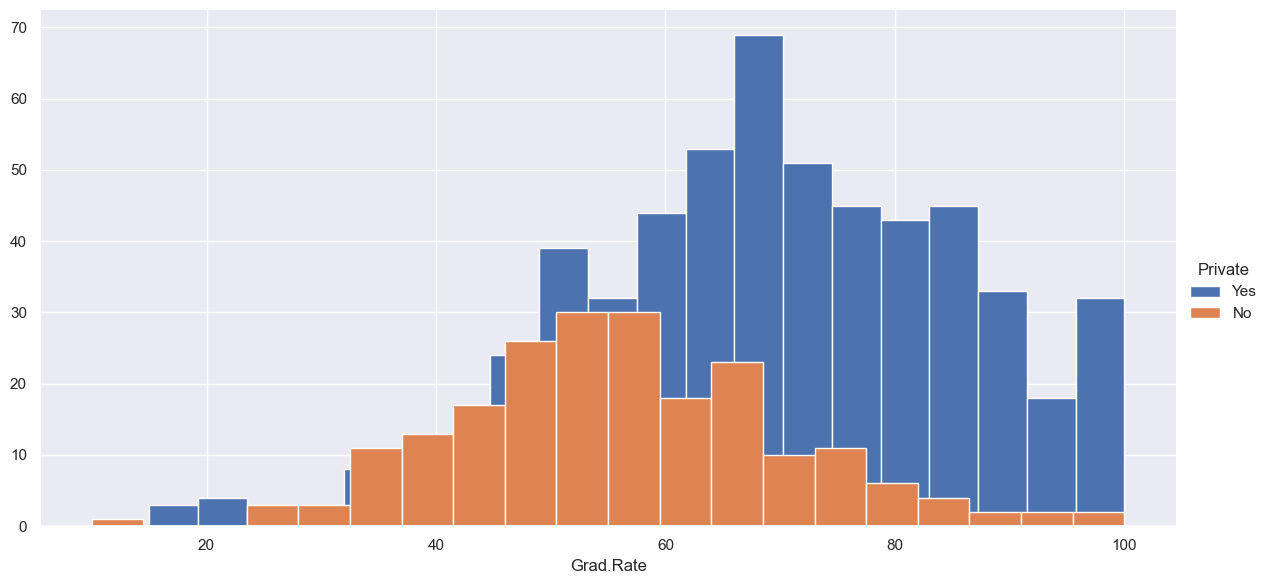

In [36]:
g = sns.FacetGrid(data=df, hue='Private', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20)
g.add_legend(title='Private')

#### K Means Cluster Creation

In [37]:
from sklearn.cluster import KMeans

In [40]:
kmeans_model = KMeans(n_clusters=2, n_init='auto')

In [41]:
kmeans_model.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2, n_init='auto')

#### Cluster center vectors

In [42]:
kmeans_model.cluster_centers_

array([[1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01],
       [1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01]])

### Evaluation

There is no perfect way to evaluate clustering if there are no labels, however since I do have the labels, I can take advantage of this to evaluate my clusters, keeping in mind, that I won't usually have this luxury in the real world.

In [43]:
def converter(private):
  if private == 'Yes':
    return 1
  else:
    return 0

In [44]:
df['Cluster'] = df['Private'].apply(converter)

In [45]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


#### Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(df['Cluster'], kmeans_model.labels_))

[[ 89 123]
 [ 12 553]]


In [48]:
print(classification_report(df['Cluster'], kmeans_model.labels_))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.83       777
   macro avg       0.85      0.70      0.73       777
weighted avg       0.84      0.83      0.80       777

